In [17]:
import pandas as pd
import networkx as nx
import collections
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import random
from pandas.plotting import table
import matplotlib.image as mpimg
from io import BytesIO
import graphviz
import pylab


In [47]:
df_ciclos_diretos = pd.read_csv('/home/gustavo/Downloads/Redes/Tabelas_Gerada/df_ciclos_diretos.csv', delimiter = ',')

In [49]:
#df_ciclos_diretos['peso'] = df_ciclos_diretos['8_percentual_retorno'].apply(
#lambda x: round(np.log(x),3))
df_ciclos_diretos['log_valor_doado'] = df_ciclos_diretos['4_valor_doado'].apply(
lambda x: round(np.log(x),3))
df_ciclos_diretos['log_valor_reembolsado'] = df_ciclos_diretos['6_valor_reembolsado'].apply(
lambda x: round(np.log(x),3))

In [50]:
#Tabela 2
df_ciclos_diretos.sort_values('8_percentual_retorno')

,1_id_empresa,2_nome_empresa,3_nome_deputado,4_valor_doado,5_qtde_doacoes,6_valor_reembolsado,7_qtde_reembolsos,8_percentual_retorno,log_valor_doado,log_valor_reembolsado
90,8381059000189,FERREIRA COMERCIO DE DERIVADOS DE PETROLEO LTDA,MARCOS ABRAO RORIZ SOARES DE CARVALHO,100000.00,3,81.45,1,-99.92,11.513,4.400
99,26198515000484,SEMPRE EDITORA LTDA.,MARCELO GUILHERME DE ARO FERREIRA,205634.40,80,251.40,5,-99.88,12.234,5.527
87,6985134000195,PETROCOM-COM.DE COMB. E DERIV. DE PETROLEO LTDA,CARLOS HENRIQUE AMORIM,200000.00,1,362.09,2,-99.82,12.206,5.892
76,37034014000136,GRECO COMÉRCIO DE FRANGOS LTDA,WALDIR SOARES DE OLIVEIRA,60000.00,1,160.85,1,-99.73,11.002,5.080
56,1059928000104,AUTO POSTO NUELE LTDA.,ANTONIO WANDSCHEER,150000.00,2,440.37,3,-99.71,11.918,6.088
86,5850518000138,POSTO DE COMBUSTÍVEIS ECOPETRO LTDA,JOSINIANE BRAGA NUNES,50000.00,1,156.41,1,-99.69,10.820,5.052
7,24186785000105,SOMAPETRO COMERCIO E TRANSPORTES LTDA,CARLOS ALBERTO DE SOUSA ROSADO SEGUNDO,58000.00,3,196.03,1,-99.66,10.968,5.278
63,9313635000113,ideal com.varejista de der.de petro eireli epp,LUIZ CARLOS CAETANO,27400.00,1,100.00,1,-99.64,10.218,4.605
37,3006726000120,Auto Posto Piloto Marcelle Locatelli Ltda,VANDER LUIZ DOS SANTOS LOUBET,200000.00,2,1198.45,6,-99.40,12.206,7.089
15,73787483000190,PORTOS EMPREENDIMENTOS LTDA,PEDRO FERNANDES RIBEIRO,75000.00,4,493.67,3,-99.34,11.225,6.202


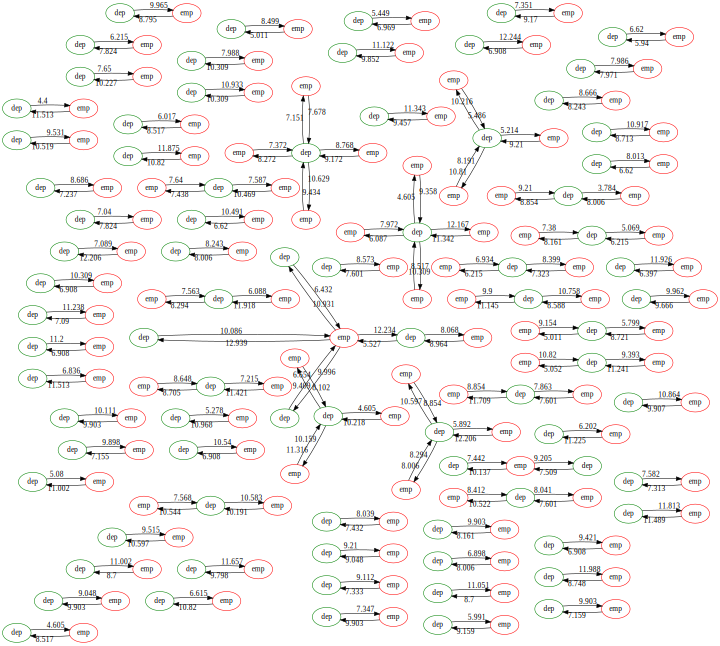

In [51]:
G = nx.MultiDiGraph()

G.add_nodes_from(df_ciclos_diretos['2_nome_empresa'], bipartite = 0)
empresa = [v for v in G.nodes if G.nodes[v]['bipartite'] == 0]
    
G.add_nodes_from(df_ciclos_diretos['3_nome_deputado'], bipartite = 1)
deputados = [v for v in G.nodes if G.nodes[v]['bipartite'] == 1]

G.add_weighted_edges_from(df_ciclos_diretos[['2_nome_empresa', '3_nome_deputado', 'log_valor_doado']].values)
G.add_weighted_edges_from(df_ciclos_diretos[['3_nome_deputado', '2_nome_empresa', 'log_valor_reembolsado']].values)


#Graphviz
d =graphviz.Digraph(format='png')
for n in deputados:
    d.node(str(n),color='green', label='dep', size = '5')

for n in empresa:
    d.node(str(n),color='red', label='emp', size = '5')


for (u,v,w) in G.edges(data='weight'):
    #dic = dict(G[u][v][w])
    d.edge(str(u), str(v), label=str(G[u][v][0]['weight']))
    

d.attr(size='10')

# To display the graph on Jupyter
d.engine='circo'
d.render('/home/gustavo/Downloads/Redes/Imagens_trabalho/Retorno_direto')
d

In [22]:
G.number_of_nodes()

183

In [9]:
df_ciclos_diretos['1_id_empresa'].nunique()

102

In [10]:
df_ciclos_diretos['3_nome_deputado'].nunique()

81

In [46]:
nx.density(G)

0.006365219479973578

In [11]:
G.number_of_edges()

212

In [24]:
nx.degree(G)

DiMultiDegreeView({'WESLEY GUSTAVO AUGUSTO DE FARIA': 2, 'JL Consultores': 2, 'MARCILIO PORTELA SOUSA': 2, 'AUTO POSTO SOBRAL LTDA': 2, 'E.M COMERCIO DE COMBUSTIVEIS LTDA': 2, 'SOJA COMERCIO DE DERIVADOS DE PETROLEO LTDA': 2, 'STAR TUR VIAGENS E TURISMO LTDA-EPP': 2, 'SOMAPETRO COMERCIO E TRANSPORTES LTDA': 2, 'LORIANE GOMES MIRANDA ME': 2, 'GRAAL OURINHOS': 2, 'Joafra Auto Posto': 2, 'DAYBOOK COMUNICACAO LTDA - ME': 2, 'GRÁFICA E EDITORA DINÂMICA LTDA ME': 2, 'Posto Danúbio Azul LTDA': 2, 'FLORIGRAF SERVIÇOS GRAFICOS': 2, 'PORTOS EMPREENDIMENTOS LTDA': 2, 'RENTAL CAR LM LTDA': 2, 'Marcones Ribeiro de Castro': 2, 'LÚCIO ESTEVES JUNIOR': 2, 'MB PRINT COLOR LTDA': 2, 'dotcom': 2, 'INPRINT INFORMATICA E SERVIÇOS LTDA': 2, 'SUPERA COMUNICAÇÃO S/C LTDA': 2, 'NOVA FREITAS IMÓVEIS - MATRIZ': 2, 'AUTO POSTO RIO NEGRINHO LTDA': 2, 'K SOLUCÕES E LOGISTICA EIRELI - EPP': 2, 'SMS SEGURANÇA E MONITORAMENTO E SERVIÇOS LTDA': 2, 'Posto Turcao LTDA': 2, 'MUNIR FRANCISCO': 2, 'C & F DE ITAGUAI LOCAÇÕES

In [12]:
nx.density(G)

0.006365219479973578

In [13]:
#Distribuição de grau
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

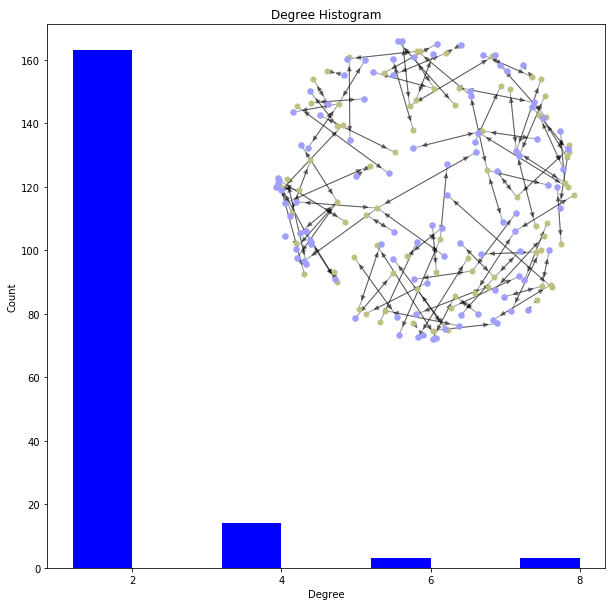

In [52]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.strongly_connected_component_subgraphs(G), key=len, reverse=True)[0]
plt.axis('off')
pos = nx.spring_layout(G, k=0.9)
nx.draw_networkx_nodes(G, pos, nodelist = deputados, node_color='#bfbf7f', node_shape="h", node_size=30)
nx.draw_networkx_nodes(G, pos, nodelist = empresa, node_color='#9f9fff', node_size=30)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.savefig('/home/gustavo/Downloads/Redes/Imagens_trabalho/Distribuição_Grau_Retorno_direto.png')
plt.show()

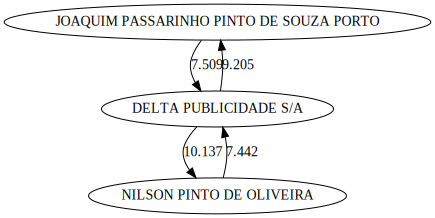

In [33]:
# 1.4.2.2. Plotando rede de ciclos diretos para um deputado específico
plt.rcParams.update({
    'figure.figsize': (10,10),
    'axes.spines.right': True,
    'axes.spines.left': True,
    'axes.spines.top': True,
    'axes.spines.bottom': True})


deputado = "RUBENS OTONI GOMIDE"
empresa = 'DELTA PUBLICIDADE S/A'
#lista_subset_graph = list(df_ciclos_diretos[df_ciclos_diretos["3_nome_deputado"] == deputado]['2_nome_empresa']) + [deputado]
lista_subset_graph = list(df_ciclos_diretos[df_ciclos_diretos["2_nome_empresa"] == empresa]['3_nome_deputado']) + [empresa]

H = G.subgraph(lista_subset_graph)
'''
nx.draw(H, style = "solid", with_labels = True)
plt.figure(figsize=(10,10))
plt.savefig("/home/gustavo/Downloads/Redes/Grafos/ciclos_LucianoDucci.png")  # save as png
plt.show()  # display
'''
dr = graphviz.Digraph(format='png')
for n in H.nodes():
    dr.node(str(n))
    
for v,u,w in H.edges(data='weight'):
    dr.edge(str(v), str(u),label=str(H[v][u][0]['weight']))
    
dr.engine
dr.render('/home/gustavo/Downloads/Redes/Imagens_trabalho/Sempre.png')
dr


In [40]:
nx.d

{'WESLEY GUSTAVO AUGUSTO DE FARIA': 1.0,
 'JL Consultores': 1.0,
 'MARCILIO PORTELA SOUSA': 1.0,
 'AUTO POSTO SOBRAL LTDA': 1.0,
 'E.M COMERCIO DE COMBUSTIVEIS LTDA': 3.0,
 'SOJA COMERCIO DE DERIVADOS DE PETROLEO LTDA': 3.0,
 'STAR TUR VIAGENS E TURISMO LTDA-EPP': 3.0,
 'SOMAPETRO COMERCIO E TRANSPORTES LTDA': 1.0,
 'LORIANE GOMES MIRANDA ME': 1.0,
 'GRAAL OURINHOS': 1.0,
 'Joafra Auto Posto': 1.0,
 'DAYBOOK COMUNICACAO LTDA - ME': 1.0,
 'GRÁFICA E EDITORA DINÂMICA LTDA ME': 1.0,
 'Posto Danúbio Azul LTDA': 1.0,
 'FLORIGRAF SERVIÇOS GRAFICOS': 1.0,
 'PORTOS EMPREENDIMENTOS LTDA': 1.0,
 'RENTAL CAR LM LTDA': 1.0,
 'Marcones Ribeiro de Castro': 1.0,
 'LÚCIO ESTEVES JUNIOR': 1.0,
 'MB PRINT COLOR LTDA': 1.0,
 'dotcom': 2.0,
 'INPRINT INFORMATICA E SERVIÇOS LTDA': 2.0,
 'SUPERA COMUNICAÇÃO S/C LTDA': 2.0,
 'NOVA FREITAS IMÓVEIS - MATRIZ': 2.0,
 'AUTO POSTO RIO NEGRINHO LTDA': 1.0,
 'K SOLUCÕES E LOGISTICA EIRELI - EPP': 2.0,
 'SMS SEGURANÇA E MONITORAMENTO E SERVIÇOS LTDA': 2.0,
 'Posto Tu

In [44]:
import operator
dic = dict(nx.degree(G))
dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)
dic = dict(dic)
sum(dic.values())/len(dic)

2.3169398907103824

In [45]:
len(dic)

183

In [26]:
#Para a tabela 6 considerar somente empresas (5 maiores)
#Para a tabela 7 considerar somente deputados (5 maiores)
# Em caso de problemas para diferenciar os dois trocar '2_nome_empresa' por '1_id_empresa' no 5º bloco
import operator
dic = dict(nx.degree_centrality(G))
dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)
dict(dic)

{'SEMPRE EDITORA LTDA.': 0.04395604395604396,
 'LUCIANO DUCCI': 0.04395604395604396,
 'RUBENS OTONI GOMIDE': 0.04395604395604396,
 'LUCIO ANTONIO MOSQUINI': 0.03296703296703297,
 'LUIZ CARLOS CAETANO': 0.03296703296703297,
 'CARLOS HENRIQUE AMORIM': 0.03296703296703297,
 'DELTA PUBLICIDADE S/A': 0.02197802197802198,
 'JUNJI ABE': 0.02197802197802198,
 'EDUARDO PEDROSA CURY': 0.02197802197802198,
 'ALEX SPINELLI MANENTE': 0.02197802197802198,
 'EDUARDO LUIZ BARROS BARBOSA': 0.02197802197802198,
 'SERGIO DE SOUZA': 0.02197802197802198,
 'LEANDRE DAL PONTE': 0.02197802197802198,
 'ANTONIO WANDSCHEER': 0.02197802197802198,
 'ALEX CANZIANI SILVEIRA': 0.02197802197802198,
 'ALCEU MOREIRA DA SILVA': 0.02197802197802198,
 'JOSINIANE BRAGA NUNES': 0.02197802197802198,
 'AUGUSTO SILVEIRA DE CARVALHO': 0.02197802197802198,
 'MARCELO GUILHERME DE ARO FERREIRA': 0.02197802197802198,
 'EROS FERREIRA BIONDINI': 0.02197802197802198,
 'WESLEY GUSTAVO AUGUSTO DE FARIA': 0.01098901098901099,
 'JL Consult

In [18]:
deg = dict(nx.degree_centrality(G))
degree = pd.DataFrame.from_dict(data=deg, orient='index')


NetworkXError: Node 'R' has no position.

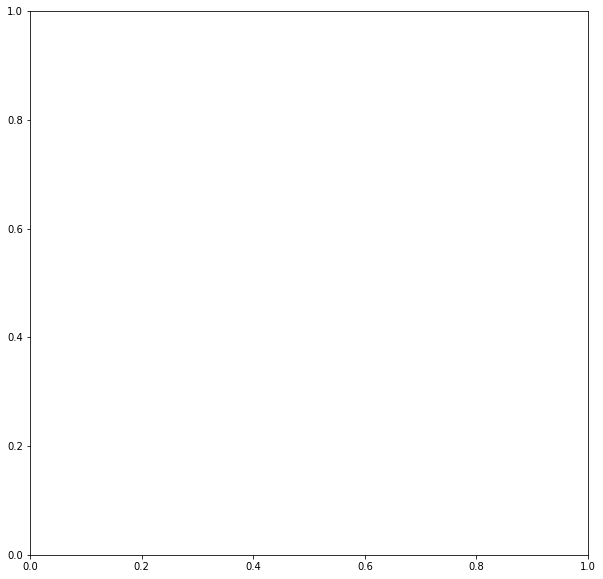

In [19]:
node = list()
degree = list()

for x,y in dic:
    node.append(x)
    degree.append(y)


plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, nodelist = deputado, node_color='#bfbf7f', node_shape="h", node_size=[v*10 for v in degree])
nx.draw_networkx_nodes(G, pos, nodelist = empresa, node_color='#9f9fff', node_size=[v*10 for v in degree])
nx.draw_networkx_edges(G, pos, alpha=0.2)b
plt.axis('off')
plt.show()

In [20]:
node

['LUCIANO DUCCI',
 'RUBENS OTONI GOMIDE',
 'LUCIO ANTONIO MOSQUINI',
 'CARLOS HENRIQUE AMORIM',
 'DELTA PUBLICIDADE S/A',
 'SEMPRE EDITORA LTDA.',
 'EDUARDO PEDROSA CURY',
 'ALEX SPINELLI MANENTE',
 'EDUARDO LUIZ BARROS BARBOSA',
 'RICARDO IZAR JUNIOR',
 'SERGIO DE SOUZA',
 'LEANDRE DAL PONTE',
 'ANTONIO WANDSCHEER',
 'ALCEU MOREIRA DA SILVA',
 'MARCELO GUILHERME DE ARO FERREIRA',
 'EROS FERREIRA BIONDINI',
 'JL Consultores',
 'SOJA COMERCIO DE DERIVADOS DE PETROLEO LTDA',
 'STAR TUR VIAGENS E TURISMO LTDA-EPP',
 'E.M COMERCIO DE COMBUSTIVEIS LTDA',
 'SOMAPETRO COMERCIO E TRANSPORTES LTDA',
 'GRAAL OURINHOS',
 'POSTO DE COMBUSTIVEIS VACCARI LTDA',
 'AJIR ARTES GRAFICAS E EDITORA LTDA - EPP',
 'YARA MARIA LIRA PAIVA E SILVA',
 'Marcones Ribeiro de Castro',
 'AUTO POSTO THIANE LTDA',
 'SUPERA COMUNICAÇÃO S/C LTDA',
 'NOVA FREITAS IMÓVEIS - MATRIZ',
 'K SOLUCÕES E LOGISTICA EIRELI - EPP',
 'SMS SEGURANÇA E MONITORAMENTO E SERVIÇOS LTDA',
 'Posto de Abast de Comb Vila Nova Ltda',
 'POSTO B

In [1]:
import networkx.algorithms.community as nxcom
result = nxcom.girvan_newman(G)
communities = next(result)
len(communities)

NameError: name 'G' is not defined